# Подключение библиотек и задание входных данных

In [10]:
import matplotlib.pyplot as plt
import scipy.fft as sp
import math
import cmath

q = 8
sw = True

N = 16
filter = 10000
A = [1,5,3,7,3,2,1]
f = [0.5,1,2,5,7,9,12]

samples = range(0,N)

k = 7
pi = math.pi

f = [i*1000 for i in f]

# Расчёт изначального сигнала и преобразование до целых чисел

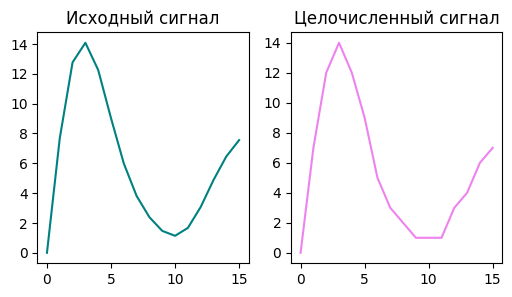

In [11]:
fd = 75000
if max(f) > 30000:
    fd = 110000
Td = 1/fd

t = []
x = []

for n in samples:
    t.append(n * Td)
    x.append(0)
    for i in range(0,k):
        x[n] += A[i] * math.sin(2*pi*f[i]*t[n])

x_old = x

x = [int(i) for i in x]

fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(6, 3))

axs[0].set_title("Исходный сигнал")
axs[0].plot(samples, x_old, 'teal')

axs[1].set_title("Целочисленный сигнал")
axs[1].plot(samples, x, 'violet')

if sw:
    plt.show()

# Натягивание совы на глобус

In [12]:
D = 2**q

def Wf(x):
    return ((math.e**(-(cmath.sqrt(-1)*2*(pi/N)*x))))

def Wf_2(x):
    d = ((math.e**(-(cmath.sqrt(-1)*2*(pi/N)*x))))*D/2
    if (x == 0):
        return 0
    return d

def Bab(A,B,W):
    print(W)
    return [A+B*W,A-B*W]

def compSum(C1,C2):
    a = C1.real
    b = C1.imag
    c = C2.real
    d = C2.imag

    return complex(a + c,b + d)

def compSub(C1,C2):
    a = C1.real
    b = C1.imag
    c = C2.real
    d = C2.imag

    return complex(a - c,b - d)

def compMul(C1,C2):
    a = C1.real
    b = C1.imag
    c = C2.real
    d = C2.imag

    return complex(a*c-b*d,a*d+b*c)

def Bab_2(A,B,W):
    print(W)
    return [compSum(A,compMul(B,W)),compSub(A,compMul(B,W))]

def BabL(AB,k):
    AB_out = [0 for i in range(0,len(AB))]
    lenH = len(AB)//2
    for i in range(0,lenH):
        AB_out[i],AB_out[i+lenH] = Bab(AB[i],AB[i+lenH],Wf(k))
    return AB_out

def BabL_2(AB,k):
    AB_out = [0 for i in range(0,len(AB))]
    lenH = len(AB)//2
    for i in range(0,lenH):
        AB_out[i],AB_out[i+lenH] = Bab_2(AB[i],AB[i+lenH],Wf_2(k))
    return AB_out





(3-6j)
